In [1]:
import librosa


ModuleNotFoundError: No module named 'librosa'


### Frequency Ranges of Common Instruments:
1. *Bass:* 20-250 Hz
2. *Electric Guitar:* 80-1200 Hz
3. *Piano:* 27-4186 Hz (but often 100-4000 Hz for most of the audible range)
4. *Vocals:* 300-3400 Hz
5. *Drums (Kick Drum):* 50-150 Hz
6. *Drums (Snare Drum):* 150-300 Hz
7. *Cymbals:* 5-20 kHz
8. *Flute:* 250-2500 Hz
9. *Violin:* 200-3000 Hz
10. *Trumpet:* 150-1200 Hz
11. *Saxophone:* 110-7000 Hz

You can apply the same FFT approach to these instruments by adjusting the frequency ranges accordingly. Below is an example that extends the previous code to include drums, flute, and violin:



In [2]:

import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from scipy.fftpack import fft, ifft

# Step 1: Load the audio file
signal, sampling_rate = sf.read('sample.flac')

# If the audio is stereo, take one channel for simplicity
if len(signal.shape) > 1:
    signal = signal[:, 0]

# Step 2: Apply FFT to transform the signal into the frequency domain
fft_result = fft(signal)
frequencies = np.fft.fftfreq(len(fft_result), 1/sampling_rate)


In [3]:
# Step 3: Design bandpass filters for each instrument
# These ranges are approximate and may need fine-tuning based on your audio file

# Bass (20-250 Hz)
bass_filter = np.logical_and(frequencies > 20, frequencies < 250)

# Electric Guitar (80-1200 Hz)
guitar_filter = np.logical_and(frequencies > 80, frequencies < 1200)

# Piano (100-4000 Hz)
piano_filter = np.logical_and(frequencies > 100, frequencies < 4000)

# Vocals (300-3400 Hz)
vocals_filter = np.logical_and(frequencies > 300, frequencies < 3400)

# Kick Drum (50-150 Hz)
kick_drum_filter = np.logical_and(frequencies > 50, frequencies < 150)

# Snare Drum (150-300 Hz)
snare_drum_filter = np.logical_and(frequencies > 150, frequencies < 300)

# Flute (250-2500 Hz)
flute_filter = np.logical_and(frequencies > 250, frequencies < 2500)

# Violin (200-3000 Hz)
violin_filter = np.logical_and(frequencies > 200, frequencies < 3000)

In [4]:
# Step 4: Apply filters to isolate each instrument
bass_fft = fft_result * bass_filter
guitar_fft = fft_result * guitar_filter
piano_fft = fft_result * piano_filter
vocals_fft = fft_result * vocals_filter
kick_drum_fft = fft_result * kick_drum_filter
snare_drum_fft = fft_result * snare_drum_filter
flute_fft = fft_result * flute_filter
violin_fft = fft_result * violin_filter

# Step 5: Apply Inverse FFT to get the filtered signals back in time domain
bass_signal = np.real(ifft(bass_fft))
guitar_signal = np.real(ifft(guitar_fft))
piano_signal = np.real(ifft(piano_fft))
vocals_signal = np.real(ifft(vocals_fft))
kick_drum_signal = np.real(ifft(kick_drum_fft))
snare_drum_signal = np.real(ifft(snare_drum_fft))
flute_signal = np.real(ifft(flute_fft))
violin_signal = np.real(ifft(violin_fft))


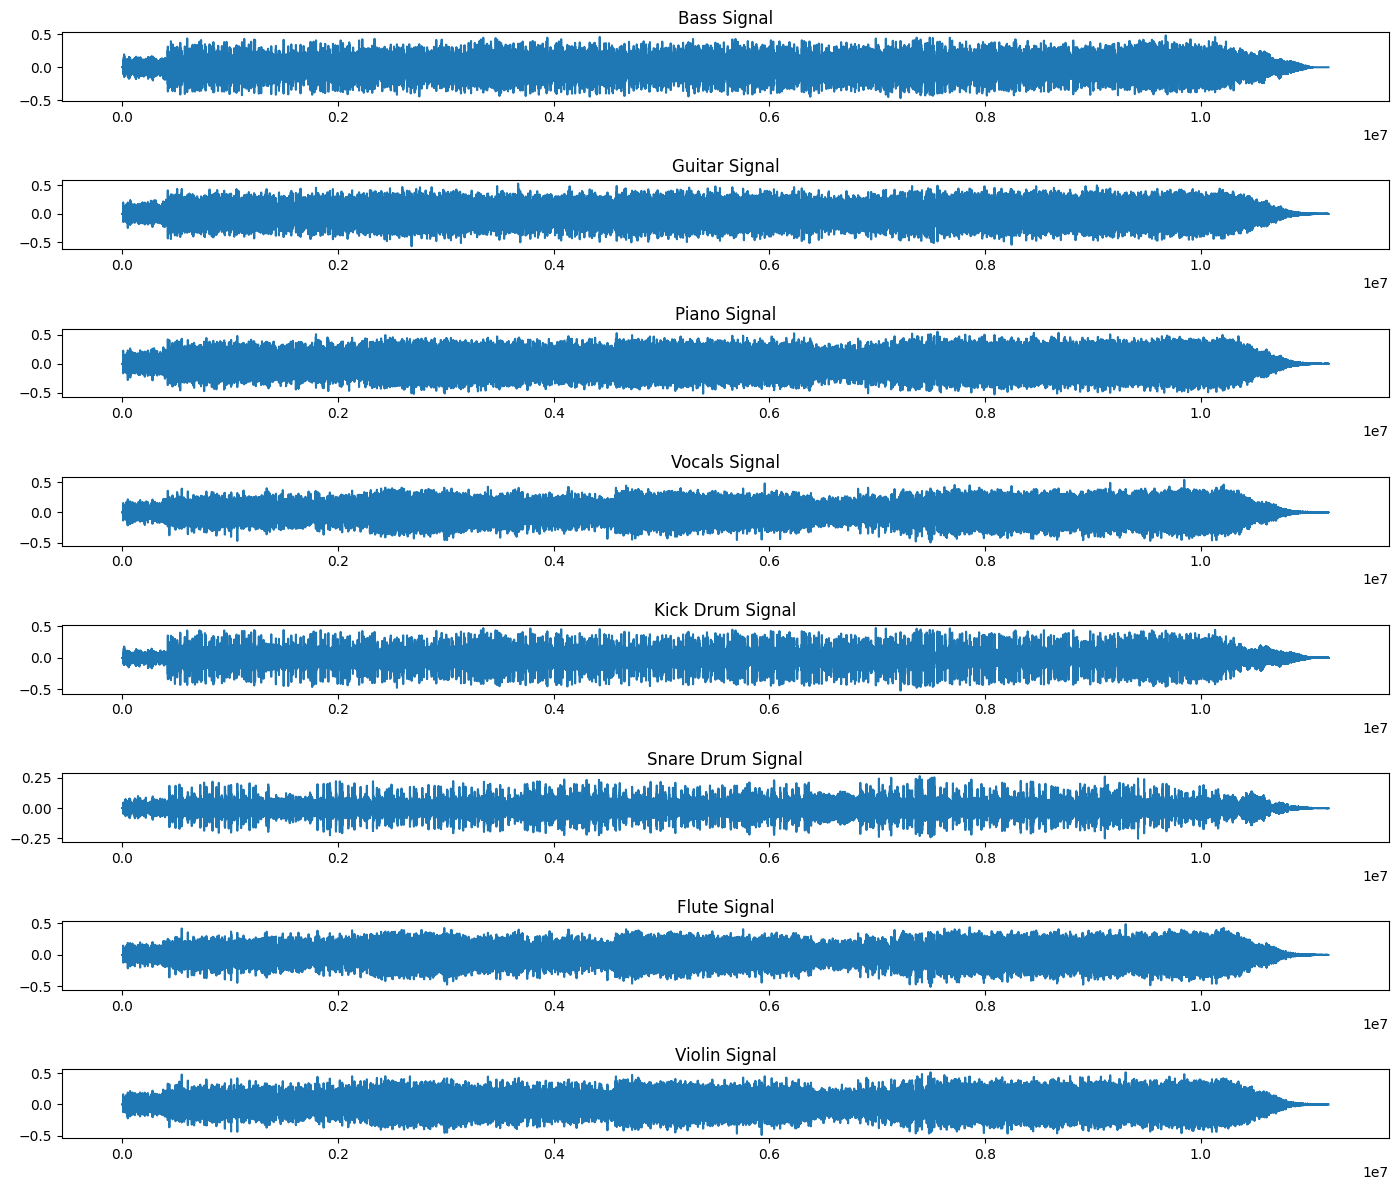

In [5]:
# Step 6: Plot or save the separated signals

# Plotting the results
plt.figure(figsize=(14, 12))

plt.subplot(8, 1, 1)
plt.plot(bass_signal)
plt.title("Bass Signal")

plt.subplot(8, 1, 2)
plt.plot(guitar_signal)
plt.title("Guitar Signal")

plt.subplot(8, 1, 3)
plt.plot(piano_signal)
plt.title("Piano Signal")

plt.subplot(8, 1, 4)
plt.plot(vocals_signal)
plt.title("Vocals Signal")

plt.subplot(8, 1, 5)
plt.plot(kick_drum_signal)
plt.title("Kick Drum Signal")

plt.subplot(8, 1, 6)
plt.plot(snare_drum_signal)
plt.title("Snare Drum Signal")

plt.subplot(8, 1, 7)
plt.plot(flute_signal)
plt.title("Flute Signal")

plt.subplot(8, 1, 8)
plt.plot(violin_signal)
plt.title("Violin Signal")

plt.tight_layout()
plt.show()



In [7]:
# You can save the separated signals as .wav files if needed
# sf.write('bass_output.flac', bass_signal.astype(np.int16), sampling_rate)
# sf.write('guitar_output.flac', guitar_signal.astype(np.int16), sampling_rate)
# sf.write('piano_output.flac', piano_signal.astype(np.int16), sampling_rate)
# sf.write('vocals_output.flac',  vocals_signal.astype(np.int16), sampling_rate)
# sf.write('kick_drum_output.flac',  kick_drum_signal.astype(np.int16), sampling_rate)
# sf.write('snare_drum_output.flac', snare_drum_signal.astype(np.int16), sampling_rate)
# sf.write('flute_output.flac',  flute_signal.astype(np.int16), sampling_rate)
# sf.write('violin_output.flac',  violin_signal.astype(np.int16), sampling_rate)